<a href="https://colab.research.google.com/github/cotozelo/Data_Science_Machine_Learning_-_Data_ICMC/blob/main/Notebooks/Aulas/Aula_01_Classificacao_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors (ou K-Vizinhos mais próximos)

* Chamado geramlente de KNN.
* Algoritmo de classificação ( com adaptações pode ser usado para regressão).
* Todas as features devem ser numéricas.
* Pressuposto: ocorrências de mesma classe devem estar localizadas próximas no espaço, mesmo podendo ser um espaço n-dimensional.
* O treino é muito rápido, mas o teste é demorado.
* Distâncias mais usadas:
  * Distância de Euclides
  * Distância Manhattan
* <a href="https://www.youtube.com/watch?v=BbYV8UfMJSA&t=67s">Lecture 4 'Curse of Dimensionality / Perceptron' -Cornell CS4780 SP17</a>
  * Explição sobre quanto maior a quantidade de dimensões, menos os vizinho são possíveis de calcular, pois todos os pontos estão distante e a mesma distância, <a href="http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html">Explicação Textual</a>
* <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">Referência</a>



## Exercício 01 - Imagens de números

###Import e Sets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Essas linhas sao apenas configuracoes de plotting. 
# Elas nao sao importantes para o seu aprendizado, entao as trataremos como "magica" por agora, ok?
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Abaixo encontram-se os hiperparametros do modelo que sera construido.
# A nao ser que seja instruido, voce nao deve modifica-los
TRAIN_TEST_SPLIT_SIZE = 0.2 # Define que o TESTE correspondera a 20% do total do dataset

### Carregar os dados

Usaremos o dataset mnist

O dataset possui 1797  imagens.


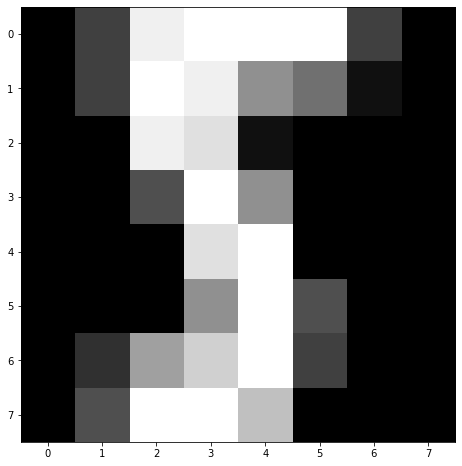

In [ ]:
dataset = datasets.load_digits()

datasetSize = len(dataset.images)
print("O dataset possui", datasetSize, " imagens.")

# Mostraremos uma imagem aleatoria dentro do dataset
plt.imshow(dataset.images[np.random.randint(datasetSize)])
plt.show()

### Separando o dataset em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TRAIN_TEST_SPLIT_SIZE)

print("Train shapes - X =", X_train.shape," y =", y_train.shape)
print("Test shapes - X =", X_test.shape," y =", y_test.shape)
print()
print(f"Exemplo de uma linha de X:\n{X_train[0]}\n")
print(f"Exemplo de uma linha de Y:\n{y_train[0]}")

Train shapes - X = (1437, 64)  y = (1437,)
Test shapes - X = (360, 64)  y = (360,)

Exemplo de uma linha de X:
[ 0.  0.  3. 12. 11.  4.  0.  0.  0.  4. 15. 13. 12. 16.  0.  0.  0.  9.
 14.  0.  0. 12.  2.  0.  0.  0. 13. 11.  7. 15.  3.  0.  0.  0.  0. 15.
 16.  7.  0.  0.  0.  0.  5. 16. 10. 14.  2.  0.  0.  0. 11. 13.  0.  8.
  8.  0.  0.  0.  2. 12. 16. 16.  7.  0.]

Exemplo de uma linha de Y:
8


### O modelo

O score do modelo com k=1 é 0.9888888888888889


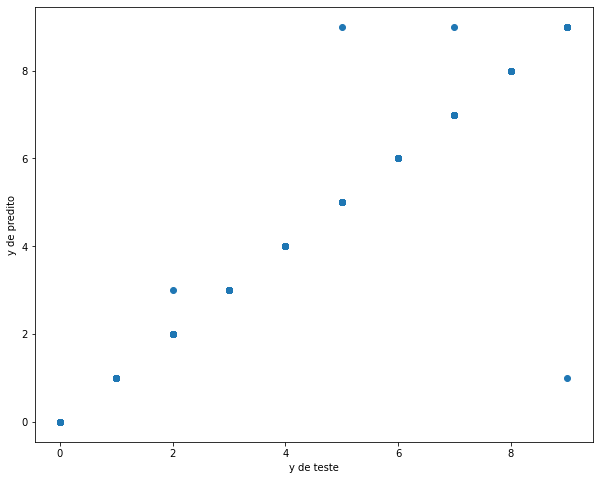

In [ ]:
k = 1 # usarndo k = 1 ou seja, somente um vizinho
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
y_predito = knn.predict(X_test)

print(f'O score do modelo com k={k} é {score}')
plt.scatter(x=y_test, y=y_predito)
plt.xlabel("y de teste")
plt.ylabel("y de predito")
plt.show()

###Métricas

In [ ]:
print(metrics.classification_report(y_test, y_predito)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        31
           2       1.00      0.97      0.99        36
           3       0.97      1.00      0.99        36
           4       1.00      1.00      1.00        45
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        33
           7       1.00      0.97      0.99        39
           8       1.00      1.00      1.00        34
           9       0.95      0.97      0.96        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



* *Precision* é intuitivamente a capacidade do classificador de não rotular como **positiva** uma amostra **negativa**
  
  Precision = tp / (tp + fp)
    * tp é o verdadeiro positivo
    * fp é o falso positivo

* *Recall* é intuitivamente a capacidade do classificador de encontrar **todas** as amostras **positivas**.

  Recall = tp / (tp + fn)
    * tp é o verdadeiro positivo 
    * fn é o falso negativo

* *F1-Score* pode ser interpretada como uma média pondera da *precision* e *recall*, onde 1 é o melhor valor e 0 o pior valor.

  f1 = 2 * (precision * recall) / (precision + recall)

* *Support* é o número de cada classe no conjunto de teste, ou seja **y_test**.

* *Accuracy* é a quantidade de acerto frente o total de amostras.



###Ajuste de hiper-parâmetros

Como esse ajuste podemos encontrar o melhor modelo, a partir de um conjunto de parâmetros. <a href=" https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">[ref]</a>

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.98538766702438 


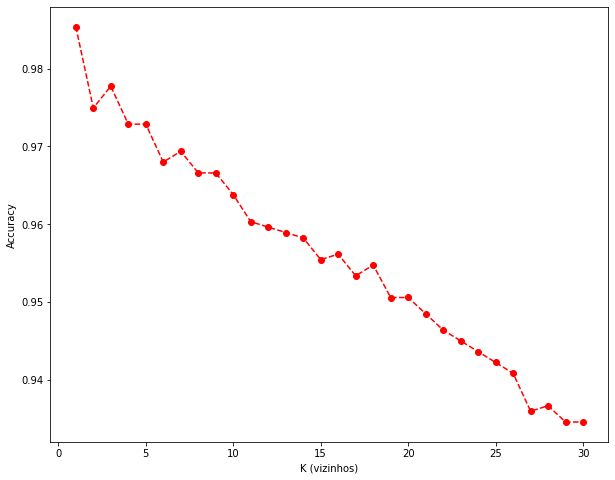

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

k_list = list(range(1, 31)) # k variando de 1 a 30
parametros = dict(n_neighbors=k_list) # converte a liste em dicionários de parâmetros

grid = GridSearchCV(knn, parametros, cv=2, scoring='accuracy')
# knn é o modelo que faremos o ajuste
# cv quantidade de rodadas, maior que zero
# scoring qual métrica usaremos para selecionar o melhor

grid.fit(X_train, y_train)

print(f"Melhores parametros {grid.best_params_} com o valor de acurácia {grid.best_score_} ")
plt.plot(k_list, grid.cv_results_['mean_test_score'], color='red', linestyle='dashed', marker='o')
plt.xlabel("K (vizinhos)")
plt.ylabel("Accuracy")
plt.show()

## Exercício 02 - Classificação de vinhos

### imports

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### biblioteca de visualização 
http://rasbt.github.io/mlxtend/

In [ ]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

### Dataset base de vinhos
https://archive.ics.uci.edu/ml/datasets/wine

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


In [ ]:
wine = datasets.load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
# Criando um df a partir da base carregada
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['class'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Explorando os dados

In [ ]:
# informações gerais sobre os dados.
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

* Podemos concluir que não há dados nulos. 
* Todas as colunas são numéricas, float64 ou int64
* Existem 178 ocorrências (ou linhas)
* Existem 14 colunas. Podemos intuir que são 13 features (caracteristicas) e 1 target (class).


In [ ]:
# analisando algumas métricas estatísticas sobre os dados
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# analisando as classes
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

A quantidade de ocorrência por classe não é balanceda.

### Separação dos dados em train e test

In [ ]:
# usaremos uma proporção de 80% para train e 20% para teste, indicadda em test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.2)

### O modelo - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN</a>

* n_neighbors: Número de vizinhos (Default=5)
* weights: Peso de amostras vizinhas (Default=uniform).
* metric: Métrica utilizada para o cálculo de distância (Default=minkowski).
* p: Parametro de poder para a métrica (Default=2).
* n_jobs: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default=1)

In [ ]:
# para nosso caso usaremos k = 1, ou seja, somente 1 (um) vizinho
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_predito = knn.predict(X_test)
y_predito

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1])

### Métricas

#### Matriz de confusão

In [ ]:
print(pd.crosstab(y_test, y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  2  All
Real                   
0        11   0  0   11
1         1  13  2   16
2         0   6  3    9
All      12  19  5   36


Na matriz de confusão, qualque valor for da diagonal principal é um erro. 

#### Recall, Precision, f1-score, ...

In [ ]:
print(metrics.classification_report(y_test, y_predito, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        11
     class_1       0.68      0.81      0.74        16
     class_2       0.60      0.33      0.43         9

    accuracy                           0.75        36
   macro avg       0.73      0.72      0.71        36
weighted avg       0.73      0.75      0.73        36



### Ajustando os hiper-parâmetros

Nesse caso vamos ajustar a quantidade de vizinhos, com isso encontraremos a quantidade de vizinho que fornece o menor erro.**negrito**

In [ ]:
# variamos os viznhos de 1 a 30
k_list = list(range(1,31))

# Variamos os pesos entre uniforme e distance
weight_list = ['uniform','distance']

# variamos p entre 1 e 2
p_list = [1,2]

parametros = dict(n_neighbors=k_list, weights=weight_list, p=p_list)
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [ ]:
# cv é a quantidade de varificações por conjunto
# scoring é a métrica usada para obter o melhor modelo, estamos usando accuracy
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')
grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# o atributo cv_results_ contém todos os resultados coletados.
grid.cv_results_

{'mean_fit_time': array([0.00191894, 0.0018888 , 0.00219936, 0.00192504, 0.00192995,
        0.00198226, 0.00204749, 0.00205059, 0.00191627, 0.00220184,
        0.00161805, 0.00148258, 0.00150943, 0.00145416, 0.00146437,
        0.00144925, 0.00148406, 0.00148783, 0.00150137, 0.00139489,
        0.00140696, 0.00177579, 0.00193243, 0.00153103, 0.00143747,
        0.00140786, 0.00162215, 0.00141573, 0.00205812, 0.00217061,
        0.00157743, 0.0015492 , 0.00200262, 0.00167112, 0.0017849 ,
        0.00162563, 0.00164332, 0.00156393, 0.00156465, 0.00172515,
        0.00171127, 0.00158615, 0.00162954, 0.00147734, 0.00151501,
        0.00142913, 0.0013978 , 0.00140557, 0.00146203, 0.00142536,
        0.00151877, 0.00147557, 0.00189958, 0.00164852, 0.0016541 ,
        0.00175343, 0.00160494, 0.00169272, 0.0019134 , 0.00152559,
        0.00154061, 0.00143709, 0.00197301, 0.00158749, 0.00152764,
        0.00152407, 0.00153379, 0.00144682, 0.00197673, 0.00148368,
        0.00184054, 0.00194821,

In [ ]:
# obtendo os scores
scores = grid.cv_results_.get('mean_test_score')
print(scores)

# rank dos melhores modelos
k_rank = grid.cv_results_.get('rank_test_score')
print(k_rank)

print(f"Melhores parametros {grid.best_params_} com o valor de acurácia {grid.best_score_} ")

[0.80936508 0.80936508 0.72507937 0.72507937 0.74793651 0.80936508
 0.66365079 0.72507937 0.75904762 0.78142857 0.70285714 0.72507937
 0.73111111 0.77031746 0.68015873 0.71396825 0.71936508 0.74190476
 0.69126984 0.71952381 0.74761905 0.76460317 0.69142857 0.71396825
 0.76444444 0.75873016 0.68063492 0.71396825 0.7084127  0.7647619
 0.68015873 0.7084127  0.77555556 0.77587302 0.70253968 0.71936508
 0.76412698 0.77031746 0.69111111 0.69698413 0.74730159 0.75904762
 0.67984127 0.71952381 0.77555556 0.77031746 0.69142857 0.71396825
 0.75857143 0.7815873  0.70793651 0.71380952 0.76444444 0.77603175
 0.70285714 0.70825397 0.77       0.78714286 0.71380952 0.7084127
 0.7531746  0.76492063 0.69730159 0.71984127 0.74730159 0.77603175
 0.69714286 0.71984127 0.74206349 0.77047619 0.70285714 0.70857143
 0.73619048 0.77587302 0.70285714 0.71984127 0.7252381  0.77587302
 0.70825397 0.7084127  0.72507937 0.77587302 0.71952381 0.70857143
 0.7084127  0.7647619  0.70253968 0.71396825 0.73619048 0.770158

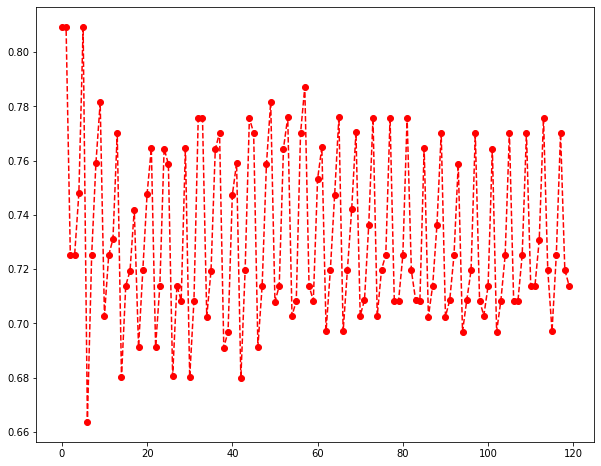

In [ ]:
plt.plot(scores, color='red', linestyle='dashed', marker='o')

### Analisando a fronteira

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


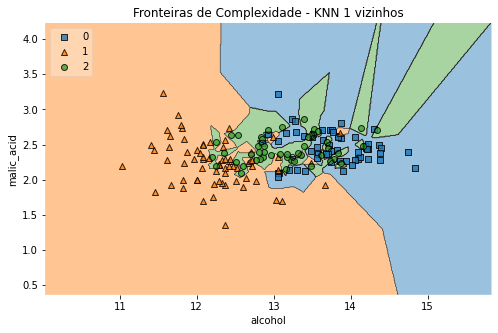

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


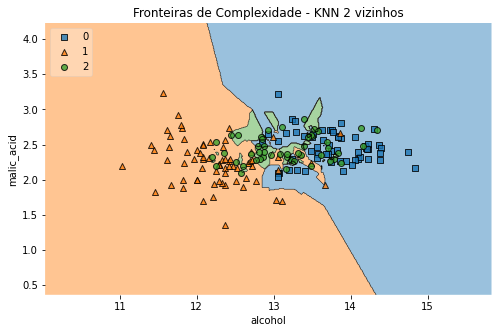

In [ ]:
def plot_fronteiras(X, y, n_vizinhos):
  knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
  knn.fit(X, y)
  plt.figure(figsize=(8,5))
  plot_decision_regions(X, y, clf=knn, legend=2)
  plt.xlabel('alcohol')
  plt.ylabel('malic_acid')
  plt.title(f'Fronteiras de Complexidade - KNN {n_vizinhos} vizinhos')
  plt.show()

plot_fronteiras(wine.data[:,[0,2]], wine.target, 1)
plot_fronteiras(wine.data[:,[0,2]], wine.target, 2)

## Exemplo 03 - Iris

### imports

In [52]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### dataset

In [4]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['class'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Analisando os dados

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Podemos verificar que o conjunto de dados contém 5 colunas, sendo 4 de features e 1 de classificação.

Todas as colunas são numéricas.

Não há dados faltantes ou nulos.

In [7]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df_iris['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

Há 3 classe diferentes, e são totamente balanceadas.

### Dados de treino e validação

In [ ]:
X = df_iris.iloc[:, :-1].values
print(X)
y = df_iris.iloc[:, 4].values
print(y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Tamanhos do X de treino {X_train.shape}')
print(f'Tamanhos do y de treino {y_train.shape}')

print(f'Tamanhos do X de teste {X_test.shape}')
print(f'Tamanhos do y de teste {y_test.shape}')


Tamanhos do X de treino (120, 4)
Tamanhos do y de treino (120,)
Tamanhos do X de teste (30, 4)
Tamanhos do y de teste (30,)


### Normalizando os dados

Note que o fit da normalização será no X_train, isso pq o X_test na prática não sabemos a priore, ou seja, o conjunto de dados que temos a mão para saber fazer a normalização é o X_train, e o X_test são os dados que viram futuramente para aplicarmos o modelo.

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### O modelo KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predizendo
y_predito = knn.predict(X_test)

### Métricas

In [45]:
# Matriz de confusao
matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_predito)
print(matriz_confusao)

print('\n---\n')

# melhorando a visualização da matriz de confusao
print(pd.crosstab(y_test, y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]

---

Predito   0   1  2  All
Real                   
0        11   0  0   11
1         0   9  0    9
2         0   1  9   10
All      11  10  9   30


In [48]:
print(classification_report(y_test, y_predito, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Grid search

Melhores parametros {'n_neighbors': 7} com o valor de acurácia 0.9666666666666667 


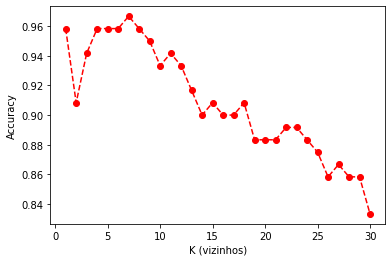

In [53]:
knn = KNeighborsClassifier(n_neighbors=2)

k_list = list(range(1, 31)) # k variando de 1 a 30
parametros = dict(n_neighbors=k_list) # converte a liste em dicionários de parâmetros

grid = GridSearchCV(knn, parametros, cv=2, scoring='accuracy')
# knn é o modelo que faremos o ajuste
# cv quantidade de rodadas, maior que zero
# scoring qual métrica usaremos para selecionar o melhor

grid.fit(X_train, y_train)

print(f"Melhores parametros {grid.best_params_} com o valor de acurácia {grid.best_score_} ")
plt.plot(k_list, grid.cv_results_['mean_test_score'], color='red', linestyle='dashed', marker='o')
plt.xlabel("K (vizinhos)")
plt.ylabel("Accuracy")
plt.show()